In [1]:
import numpy as np
import scipy.stats as sts
from scipy import signal
import matplotlib.pyplot as plt
import random

In [5]:
def original(x):
    return sts.norm(-4, 0.5).pdf(x) + sts.norm(4, 1).pdf(x)
def proposal(x_0, eps):
    return sts.norm(x_0, eps).rvs()
    
def acceptance(old, new, eps):
    return (original(new)*proposal(new, eps)) / (original(old)*proposal(old, eps))

In [6]:
def mh(eps):
    pos_ls = []
    r_ls = []
    pos = random.uniform(-20, 20)
    for t in range(1001):
        new_pos = proposal(pos, eps)
        r = acceptance(pos, new_pos, eps)
        r_ls.append(r)
        if r > random.random():
            pos = new_pos
        pos_ls.append(pos)
    return pos_ls, r_ls

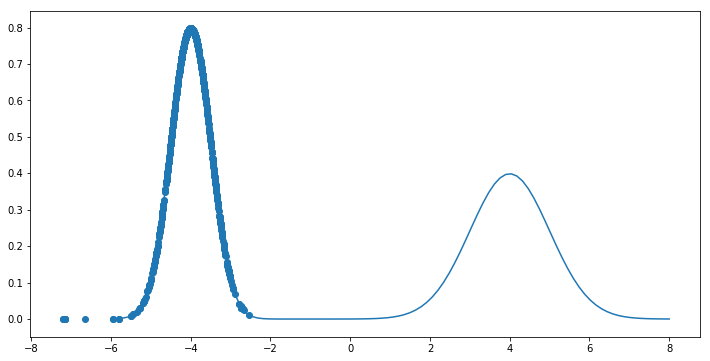

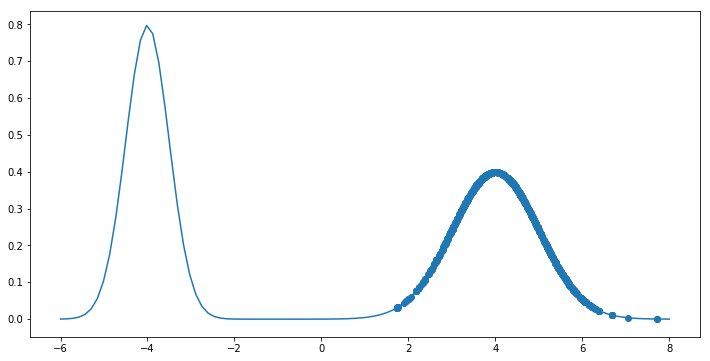

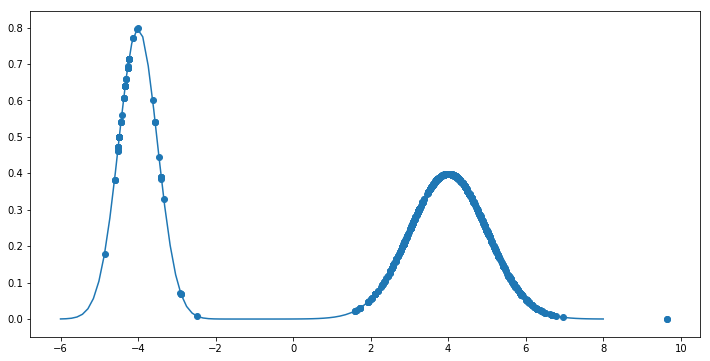

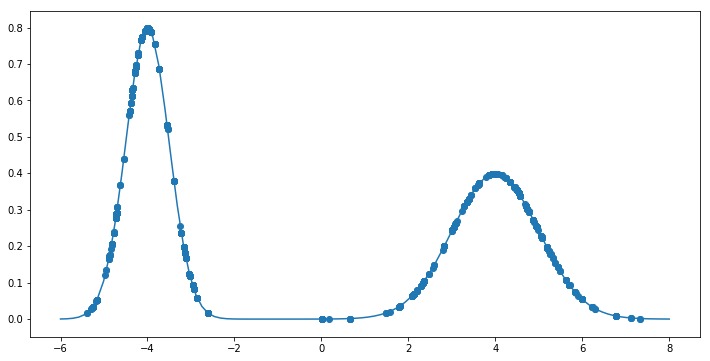

In [17]:
pos_ls_ls = []
for eps in [0.5, 1,  2, 4]:
    pos_ls, r_ls = mh(eps)
    pos_ls_ls.append(pos_ls)
    x = np.linspace(-6, 8, 100)
    plt.figure(figsize = (12, 6))
    plt.plot(x, original(x))
    plt.scatter(pos_ls, original(pos_ls))


In [18]:
def plot_acf(x):
    '''
    Plot the autocorrelation function for a series x. This corresponds to the
    acf() function in R. The series x is detrended by subtracting the mean of
    the series before computing the autocorrelation.
    The autocorrelation at lag = 0 is always 1 since the series is perfectly
    correlated with itself. You can ignore this value. The autocorrelation at
    all other values should be as small as possible, since independent samples
    have no correlation.
    '''

    plt.acorr(x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))

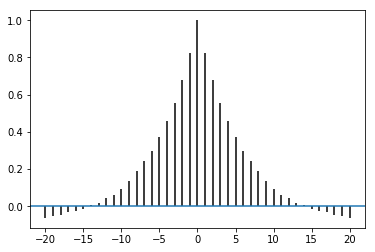

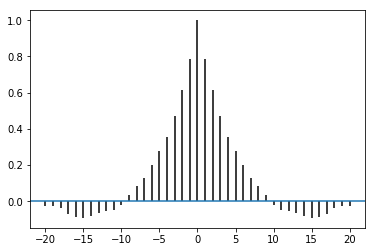

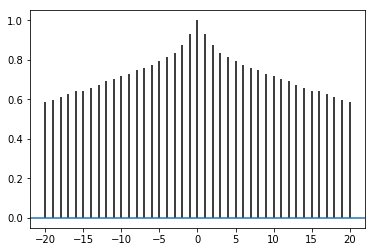

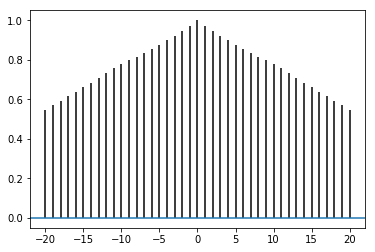

In [19]:
for each in pos_ls_ls:
    plt.figure()
    plot_acf(each)